In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data Preprocessing 
from sklearn import preprocessing

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Model Evaluations
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve

# Ignore Warning 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df['Drug'].nunique()

5

In [4]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [5]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [6]:
df["BP"].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [7]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [8]:
le1 = preprocessing.LabelEncoder()
df['Drug']= le1.fit_transform(df['Drug'])
df['Cholesterol']= le1.fit_transform(df['Cholesterol'])
df['BP']= le1.fit_transform(df['BP'])
df['Sex']= le1.fit_transform(df['Sex'])

In [9]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [10]:
len(df)

200

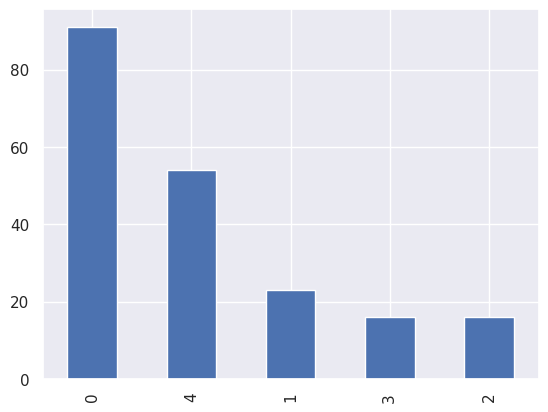

In [11]:
df["Drug"].value_counts().plot(kind="bar");

# Inference 2: 
Data Distribution over high and normal cholesterol levels are similar. That's good!

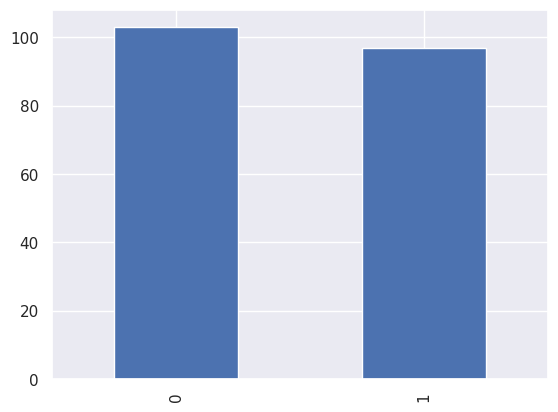

In [12]:
df["Cholesterol"].value_counts().plot(kind="bar");

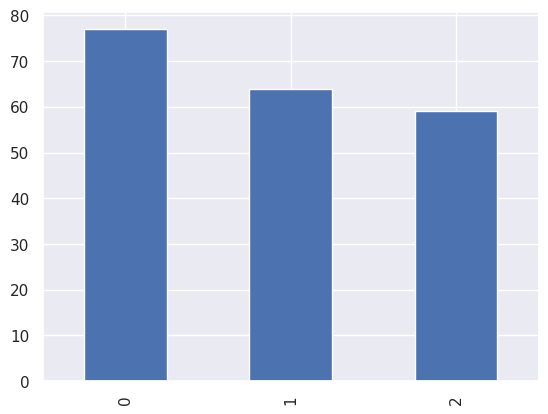

In [13]:
df["BP"].value_counts().plot(kind="bar");

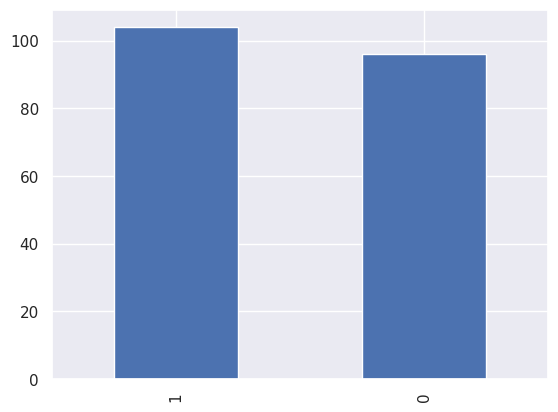

In [14]:
df["Sex"].value_counts().plot(kind="bar");

In [15]:
# Data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [16]:
# Are there any missing values?
df.isna().sum()
# There are none!

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df.describe()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,16.084485,1.595000
std,16.544315,0.500854,0.821752,0.501029,7.223956,1.716305
min,15.000000,0.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,10.445500,0.000000
50%,45.000000,1.000000,1.000000,0.000000,13.936500,1.000000
75%,58.000000,1.000000,2.000000,1.000000,19.380000,4.000000
max,74.000000,1.000000,2.000000,1.000000,38.247000,4.000000


In [17]:
pd.crosstab(df["Drug"], df["Sex"])

Sex,0,1
Drug,,
0,47,44
1,9,14
2,6,10
3,7,9
4,27,27


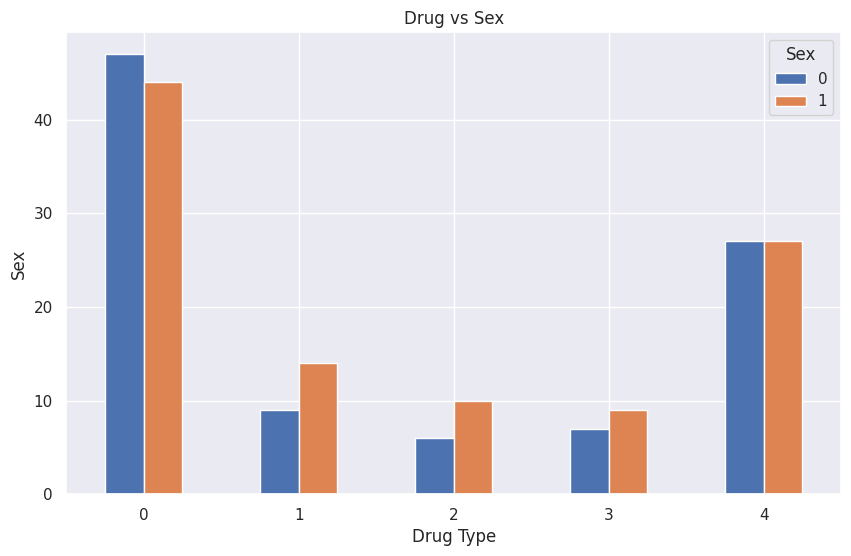

In [18]:
pd.crosstab(df["Drug"], df["Sex"]).plot(kind="bar",
                                   figsize=(10, 6))
plt.title("Drug vs Sex")
plt.xlabel("Drug Type")
plt.ylabel("Sex")
plt.xticks(rotation=0);


In [19]:
pd.crosstab(df["Drug"], df["BP"])

BP,0,1,2
Drug,,,
0,38,30,23
1,23,0,0
2,16,0,0
3,0,16,0
4,0,18,36


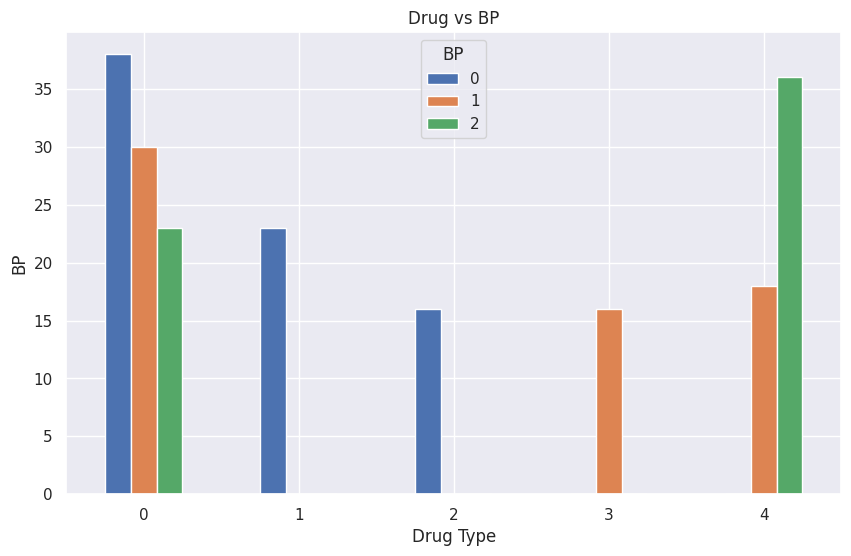

In [ ]:
# Compare bp column with sex column
pd.crosstab(df["Drug"], df["BP"]).plot(kind="bar",
                                   figsize=(10, 6))
plt.title("Drug vs BP")
plt.xlabel("Drug Type")
plt.ylabel("BP")
plt.xticks(rotation=0);

In [20]:
pd.crosstab(df["Drug"], df["Cholesterol"])

Cholesterol,0,1
Drug,,
0,47,44
1,12,11
2,8,8
3,16,0
4,20,34


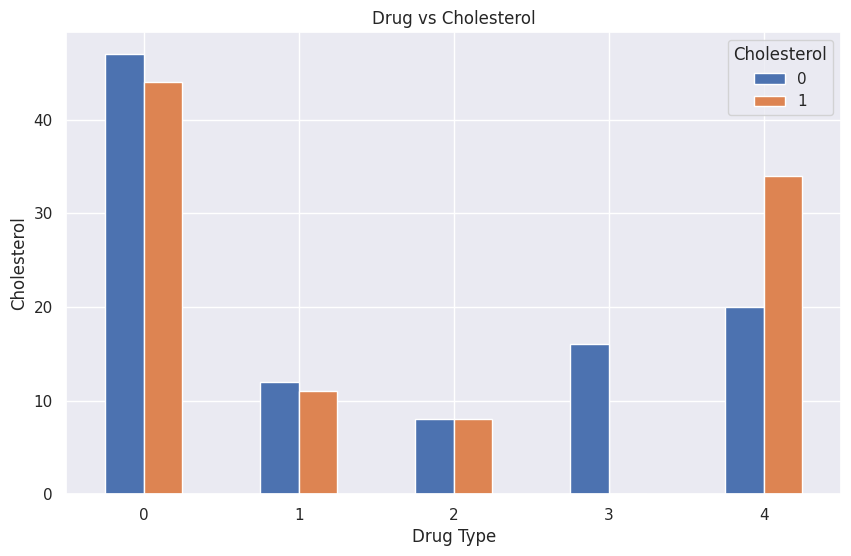

In [21]:
# Compare cholesterol column with sex column
pd.crosstab(df["Drug"], df["Cholesterol"]).plot(kind="bar",
                                   figsize=(10, 6))
plt.title("Drug vs Cholesterol")
plt.xlabel("Drug Type")
plt.ylabel("Cholesterol")
plt.xticks(rotation=0);

In [22]:
pd.crosstab(df["Sex"], df["Cholesterol"])

Cholesterol,0,1
Sex,,
0,49,47
1,54,50


In [23]:
pd.crosstab(df["Sex"], df["BP"])

BP,0,1,2
Sex,,,
0,38,28,30
1,39,36,29


In [24]:
pd.crosstab(df["Cholesterol"], df["BP"])

BP,0,1,2
Cholesterol,,,
0,35,31,37
1,42,33,22


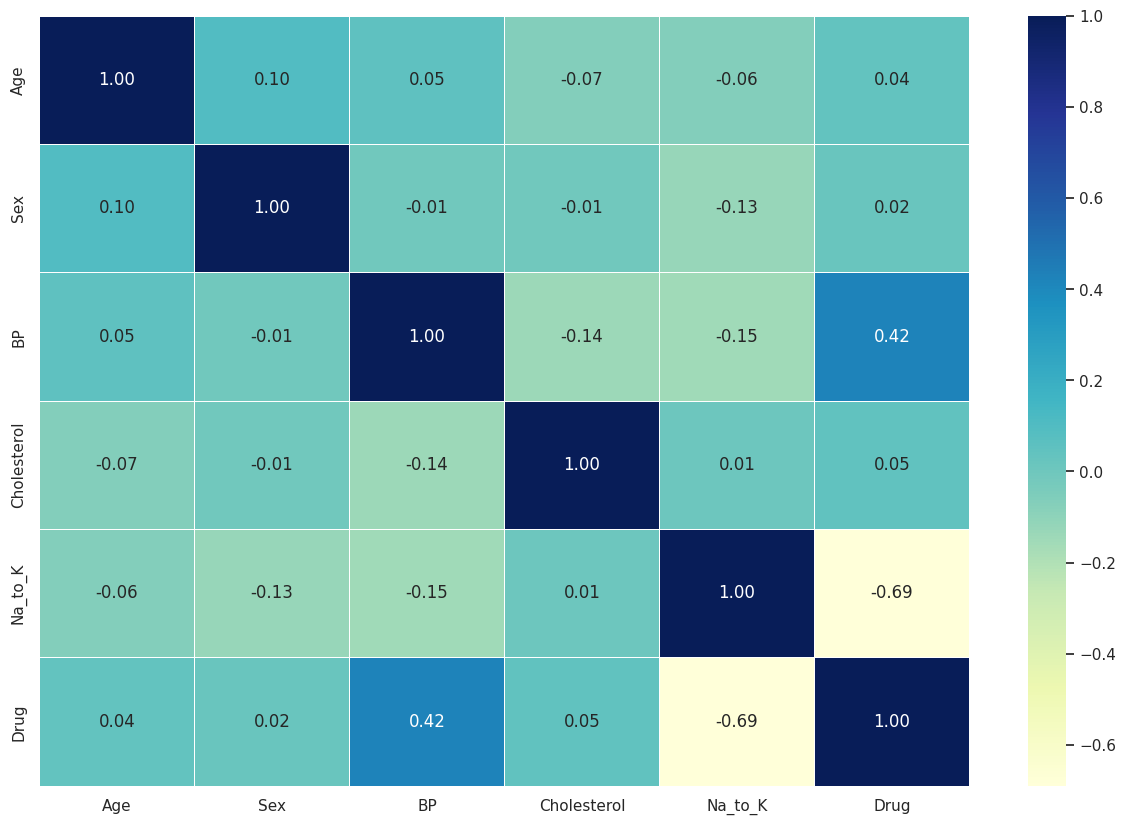

In [25]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, 
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [47]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(df.drop("Drug", axis = 1),
                                                    df["Drug"],
                                                    test_size=0.2,random_state=42)

In [48]:
x = df.drop("Drug", axis = 1)
y = df["Drug"]

p_values = f_regression(x,y)[1]
len(p_values)

5

In [49]:
l = []

col = list(df.columns)
iter_df = 0

for value in p_values:
    if col[iter_df] == "close":
        iter_df += 1
        
    l.append({col[iter_df] : value.round(3)})
    iter_df += 1
    
l

[{'Age': 0.556},
 {'Sex': 0.798},
 {'BP': 0.0},
 {'Cholesterol': 0.496},
 {'Na_to_K': 0.0}]

In [50]:
# Put models in a dictionary
models = {"ANN": MLPClassifier(),
          "Random Forest": RandomForestClassifier(),
          "SVM": SVC(),
         "XGBoost": XGBClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [51]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'ANN': 0.5, 'Random Forest': 1.0, 'SVM': 0.625, 'XGBoost': 0.975}

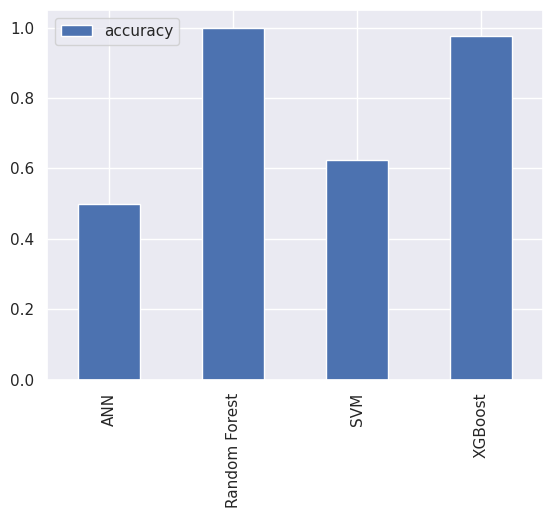

In [52]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [53]:
xgb_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}


In [54]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
xgb = RandomizedSearchCV(XGBClassifier(), 
                           param_distributions=xgb_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
xgb.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[15:36:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[15:36:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[15:36:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[15:36:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[15:36:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[15:36:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[15:36:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[15:36:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[15:36:50] WARNING

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [55]:
xgb.best_params_

{'n_estimators': 510,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [56]:
xgb.score(X_test, y_test)

0.975

In [57]:
y_preds = xgb.predict(X_test)

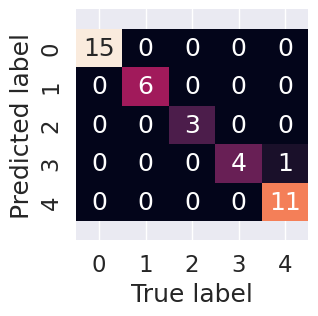

In [58]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [59]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      0.80      0.89         5
           4       0.92      1.00      0.96        11

    accuracy                           0.97        40
   macro avg       0.98      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40



In [60]:

from sklearn.preprocessing import StandardScaler
import joblib

In [61]:
# Initialize the scaler
scaler = StandardScaler()

In [64]:
# Define X as the input features and y as the target variable
x = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

In [66]:
# Fit the scaler to the data
scaler.fit(x)

StandardScaler()

In [67]:
# Save the model and scaler as pickle files
joblib.dump(xgb, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']